<a href="https://colab.research.google.com/github/ravi-prakash1907/Machine-Learning-for-Cyber-Security/blob/main/Labs/deepNN_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## lib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils as utils
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense

import numpy as np
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn 
import cv2
import IPython
from six.moves import urllib
print(tf.__version__)

2.5.0


In [ ]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

In [ ]:
type(test_features)

numpy.ndarray

In [ ]:
train_mean = np.mean(train_features, axis = 0)
train_std = np.std(train_features, axis = 0)
train_features = (train_features - train_mean) / train_std

In [ ]:
def build_model():
  model = keras.Sequential([
                            Dense(20, activation=tf.nn.relu, input_shape=[len(train_features[0])]),
                            Dense(1)
  ])

  model.compile(optimizer=tf.optimizers.Adam(),
                loss='mse',
                metrics=['mae','mse'])
  return model


In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.',end='')
  
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split=0.1,
                    callbacks = [early_stop, PrintDot()] )
  
hist = pd.DataFrame(history.history)
hist['epoc'] = history.epoch

rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
print()
print("Final RMSE on val: ",round(rmse_final,3))


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
............................................................
Final RMSE on val:  2.373


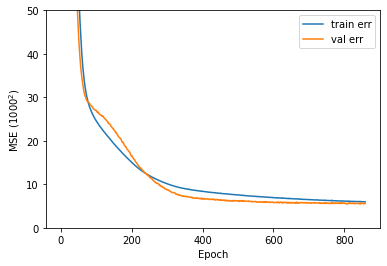

In [ ]:
def plot_history():
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('MSE (1000$^2$)')
  plt.plot(hist['epoc'], hist['mse'], label='train err')
  plt.plot(hist['epoc'], hist['val_mse'], label='val err')
  plt.legend()
  plt.ylim([0,50])

plot_history()

**training err VS validation err** ???  

---

In [ ]:
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm,test_labels)
rmse = np.sqrt(mse)
print("RMSE on test: ",round(rmse,3))

4/4 [==============================] - 0s 3ms/step - loss: 15.6994 - mae: 2.5330 - mse: 15.6994
RMSE on test:  3.962
